# Лабораторна робота №3
з дисципліни "Нейронні мережі"

студента групи АнД-41

Айрапетова Давида

Варіант № 1
Завдання
На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.

Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи у наведеній нижче таблиці.

Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).

Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.

Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb

Результати викласти у репозиторії GitHub (папка Lab3).

Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

Індекси за варіантом: 0,3,7

In [85]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

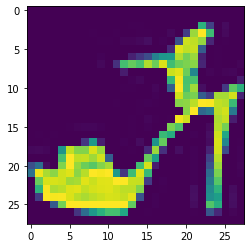

In [86]:
import matplotlib.pyplot as plt
plt.imshow(train_data[9]);

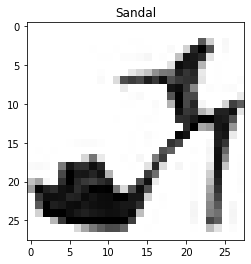

In [87]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(train_data[9], cmap=plt.cm.binary) 
plt.title(class_names[train_labels[9]]);

In [88]:
var_classes = [0,3,7]
var_names = {0:'T-shirt/top', 3:'Dress', 7:'Sneaker'}

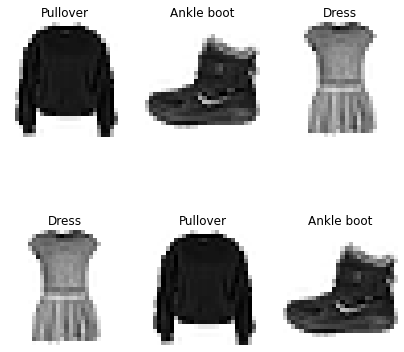

In [89]:
import random
random.seed(10)
plt.figure(figsize=(7, 7))

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    rand_index = random.choice(var_classes)
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [90]:
import numpy as np
X_train = train_data[np.where(np.in1d(train_labels, var_classes))]
y_train = train_labels[np.where(np.in1d(train_labels, var_classes))]
X_test = test_data[np.where(np.in1d(test_labels, var_classes))]
y_test = test_labels[np.where(np.in1d(test_labels, var_classes))]

In [91]:

tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(X_train,
                                y_train,
                                epochs=10,
                                validation_data=(X_test, y_test))

Epoch 1/10
563/563 [==============================] - 1s 1ms/step - loss: 2.3459 - accuracy: 0.3274 - val_loss: 1.4808 - val_accuracy: 0.3333
Epoch 2/10
563/563 [==============================] - 1s 1ms/step - loss: 1.3047 - accuracy: 0.3334 - val_loss: 1.1960 - val_accuracy: 0.3333
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 1.1581 - accuracy: 0.3326 - val_loss: 1.1342 - val_accuracy: 0.3333
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 1.1237 - accuracy: 0.3392 - val_loss: 1.1164 - val_accuracy: 0.3333
Epoch 5/10
563/563 [==============================] - 1s 1ms/step - loss: 1.1122 - accuracy: 0.3320 - val_loss: 1.1088 - val_accuracy: 0.3333
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 1.1068 - accuracy: 0.3331 - val_loss: 1.1055 - val_accuracy: 0.3333
Epoch 7/10
563/563 [==============================] - 1s 1ms/step - loss: 1.1020 - accuracy: 0.3349 - val_loss: 1.0853 - val_accuracy: 0.3537
Epoch 

In [92]:
model_11.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 4)                 3140      
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [93]:
X_train.min(), X_train.max()

(0, 255)

In [94]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

In [95]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(X_train_norm,
                            y_train,
                            epochs=10,
                            validation_data=(X_test_norm, y_test))

Epoch 1/10
563/563 [==============================] - 1s 1ms/step - loss: 0.4676 - accuracy: 0.8772 - val_loss: 0.1419 - val_accuracy: 0.9540
Epoch 2/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1231 - accuracy: 0.9537 - val_loss: 0.1225 - val_accuracy: 0.9553
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1106 - accuracy: 0.9576 - val_loss: 0.1148 - val_accuracy: 0.9580
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 0.1024 - accuracy: 0.9612 - val_loss: 0.1097 - val_accuracy: 0.9617
Epoch 5/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0966 - accuracy: 0.9628 - val_loss: 0.1168 - val_accuracy: 0.9553
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0917 - accuracy: 0.9647 - val_loss: 0.1105 - val_accuracy: 0.9603
Epoch 7/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0889 - accuracy: 0.9654 - val_loss: 0.1085 - val_accuracy: 0.9593
Epoch 

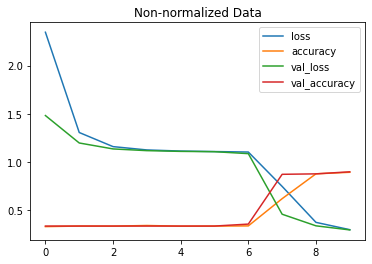

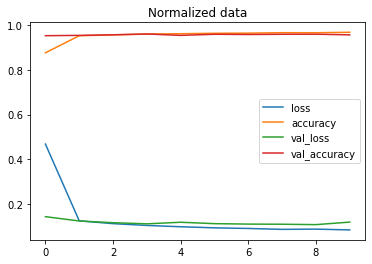

In [96]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [97]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(X_train_norm,
                               y_train,
                               epochs=20,
                               validation_data=(X_test_norm, y_test),
                               callbacks=[lr_scheduler])

Epoch 1/20
563/563 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.8772 - val_loss: 0.1419 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 2/20
563/563 [==============================] - 1s 1ms/step - loss: 0.1229 - accuracy: 0.9543 - val_loss: 0.1218 - val_accuracy: 0.9570 - lr: 0.0011
Epoch 3/20
563/563 [==============================] - 1s 1ms/step - loss: 0.1099 - accuracy: 0.9582 - val_loss: 0.1193 - val_accuracy: 0.9537 - lr: 0.0013
Epoch 4/20
563/563 [==============================] - 1s 1ms/step - loss: 0.1016 - accuracy: 0.9615 - val_loss: 0.1078 - val_accuracy: 0.9610 - lr: 0.0014
Epoch 5/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0960 - accuracy: 0.9634 - val_loss: 0.1221 - val_accuracy: 0.9530 - lr: 0.0016
Epoch 6/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0933 - accuracy: 0.9642 - val_loss: 0.1111 - val_accuracy: 0.9577 - lr: 0.0018
Epoch 7/20
563/563 [==============================] - 1s 1ms/step - lo

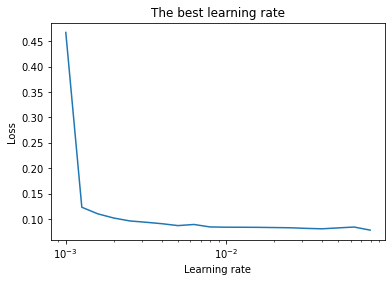

In [98]:
lrs = 1e-3 * (10**(np.arange(20)/10))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("The best learning rate");

In [99]:
find_lr_history_df = pd.DataFrame(find_lr_history.history)
optimal_lr = find_lr_history_df.loc[find_lr_history_df['loss'].idxmin()]['lr']

In [100]:
model_opt = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_opt.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=optimal_lr),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])

history = model_opt.fit(X_train_norm,
                        y_train,
                        epochs=15,
                        validation_data=(X_test_norm, y_test))

Epoch 1/15
563/563 [==============================] - 1s 1ms/step - loss: 0.1758 - accuracy: 0.9320 - val_loss: 0.1172 - val_accuracy: 0.9573
Epoch 2/15
563/563 [==============================] - 1s 1ms/step - loss: 0.1092 - accuracy: 0.9576 - val_loss: 0.1069 - val_accuracy: 0.9607
Epoch 3/15
563/563 [==============================] - 1s 1ms/step - loss: 0.1041 - accuracy: 0.9614 - val_loss: 0.1098 - val_accuracy: 0.9607
Epoch 4/15
563/563 [==============================] - 1s 1ms/step - loss: 0.0962 - accuracy: 0.9636 - val_loss: 0.1091 - val_accuracy: 0.9620
Epoch 5/15
563/563 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9656 - val_loss: 0.1380 - val_accuracy: 0.9503
Epoch 6/15
563/563 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9644 - val_loss: 0.1113 - val_accuracy: 0.9637
Epoch 7/15
563/563 [==============================] - 1s 1ms/step - loss: 0.0850 - accuracy: 0.9684 - val_loss: 0.1026 - val_accuracy: 0.9630
Epoch 

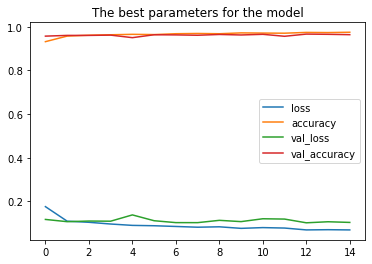

In [101]:
pd.DataFrame(history.history).plot(title="The best parameters for the model")
y_pred = model_opt.predict(X_test_norm)

In [102]:
from sklearn.metrics import confusion_matrix

y_pred_res = []
for elem in y_pred:
    y_pred_res.append(elem.argmax())
    
confusion_matrix(y_test, y_pred_res)

array([[ 949,   49,    2],
       [  57,  943,    0],
       [   0,    0, 1000]], dtype=int64)